In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [3]:
data = pd.read_csv("data_for_lr.csv")

In [4]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.shape

(699, 2)

## splitting data

In [12]:
np.array(data.x[0:500]).reshape(500,1)

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [14]:
#training input and output data
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

In [15]:
#validation input and output data
test_input = np.array(data.x[500:699]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)

# <font color = "green">Linear Regression</font>

## forward propogation

f(x) = m*x+c

In [24]:
def forward_propogation(train_input,parameters):
    m = parameters["m"]
    c = parameters["c"]

    predictions = np.multiply(m,train_input)+c
    return predictions

## cost function

In [17]:
def cost_function(predictions, train_output):
    cost = np.mean((predictions - train_output)**2)*0.5
    return cost
    

## gradient descent for back propogation

In [18]:
def backward_propogation(train_input,train_output,predictions):
    derivatives = dict()
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_output))
    dc = np.mean(df)
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    derivatives["df"] = df

    return derivatives

## update parameters

In [19]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate*derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate*derivatives["dc"]

    return parameters

# model training

In [42]:
def train(train_input,train_output, learning_rate, iters):
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)

    plt.figure()
    #loss
    loss = list()

    for i in range(iters):
        predictions = forward_propogation(train_input,parameters)
        cost = cost_function(predictions,train_output)
        loss.append(cost)
        print("Itiration : "+str(i+1) +" Loss : "+str(cost))

        fig, ax  = plt.subplots()
        ax.plot(train_input,train_output,"+",label = "Original")
        ax.plot(train_input,predictions,"*",label = "Training")

        legend = ax.legend()
        plt.plot(train_input,train_output,"+",label = "Original")
        plt.plot(train_input,predictions,"*",label = "Training")
        plt.show()
        
        derivatives = backward_propogation(train_input,train_output,predictions)
        parameters = update_parameters(parameters,derivatives,learning_rate)
        

    return parameters, loss  

Itiration : 1 Loss : 1500.2104911977592


<Figure size 640x480 with 0 Axes>

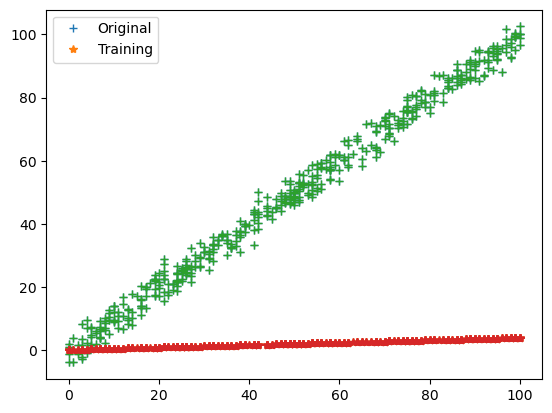

Itiration : 2 Loss : 682.8351180244102


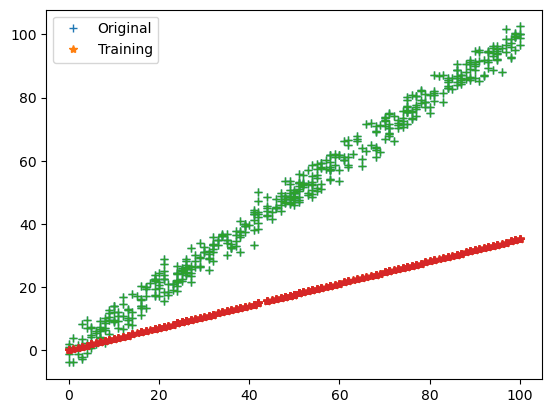

Itiration : 3 Loss : 311.60472905177926


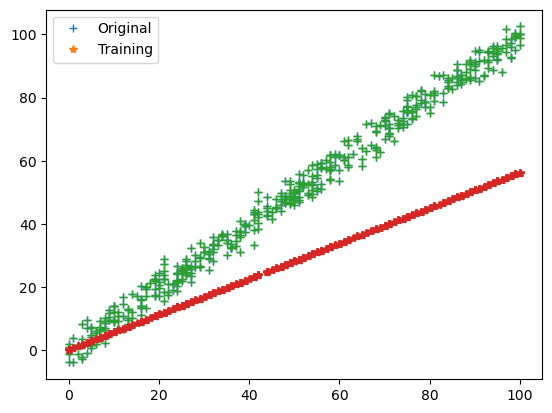

Itiration : 4 Loss : 143.12046857097386


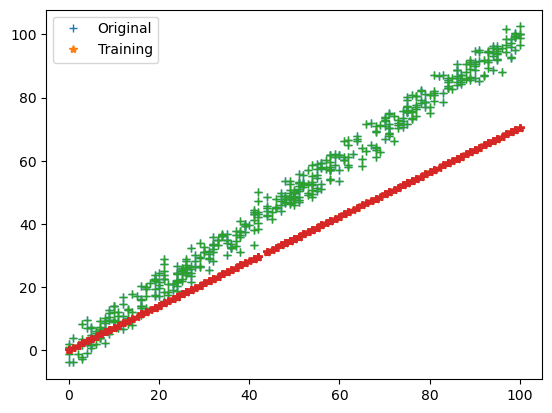

Itiration : 5 Loss : 66.73352162330312


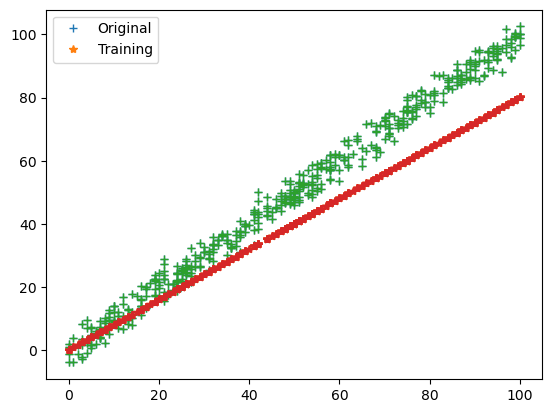

Itiration : 6 Loss : 32.15564642797205


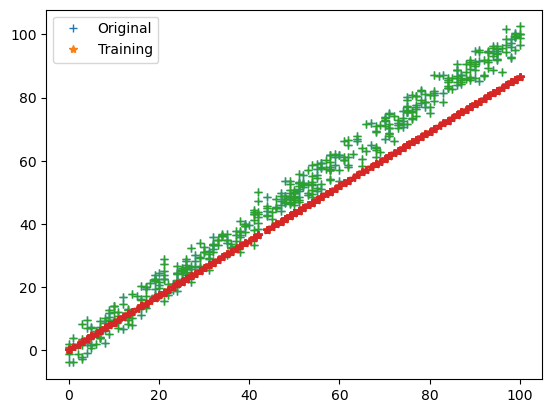

Itiration : 7 Loss : 16.540066927620543


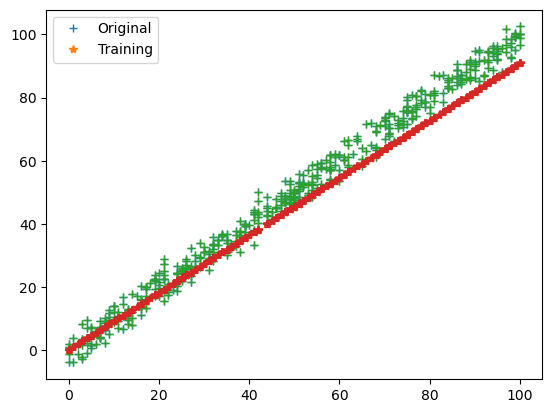

Itiration : 8 Loss : 9.51284168618925


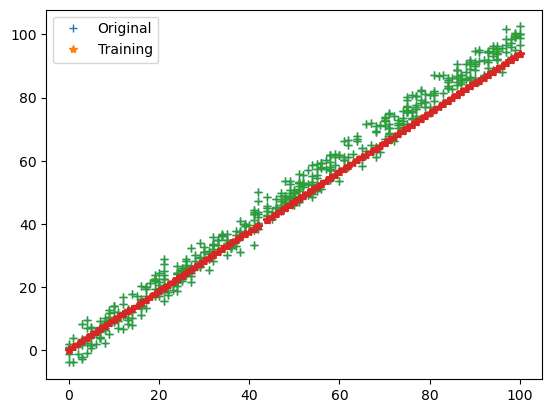

Itiration : 9 Loss : 6.367383299236768


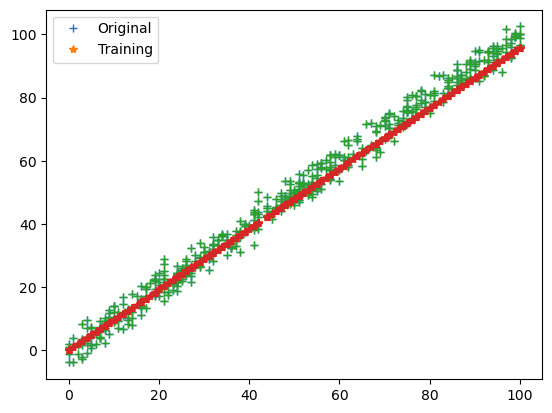

Itiration : 10 Loss : 4.97095604347764


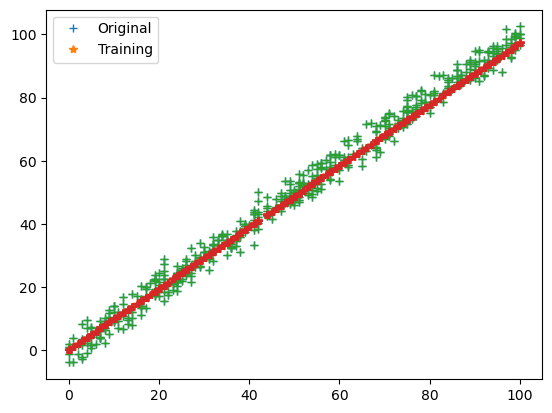

Itiration : 11 Loss : 4.358900882837949


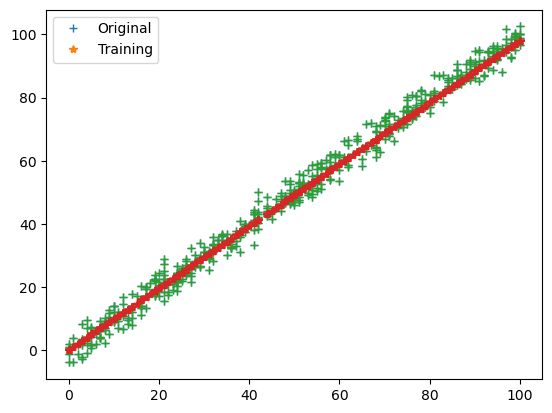

Itiration : 12 Loss : 4.096087430410016


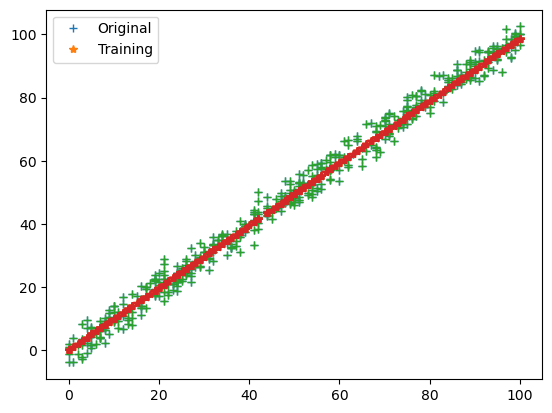

Itiration : 13 Loss : 3.9870512051309683


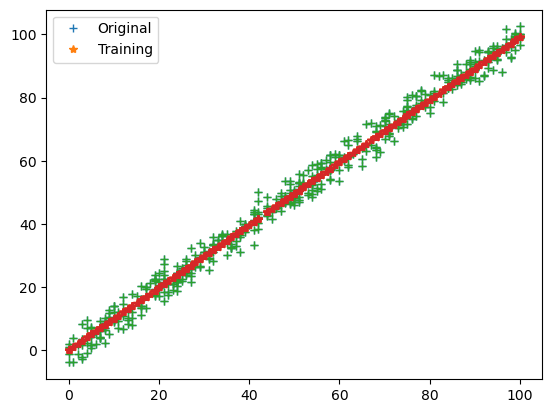

Itiration : 14 Loss : 3.944538989901448


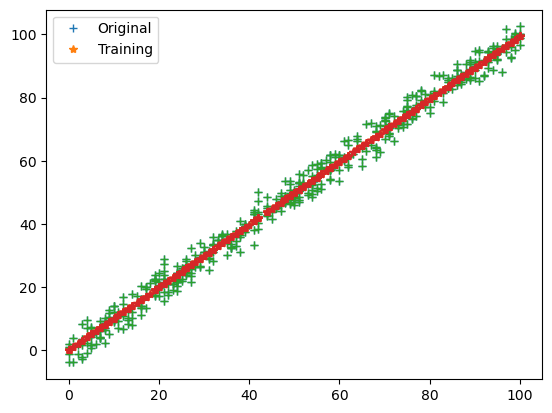

Itiration : 15 Loss : 3.929978279163606


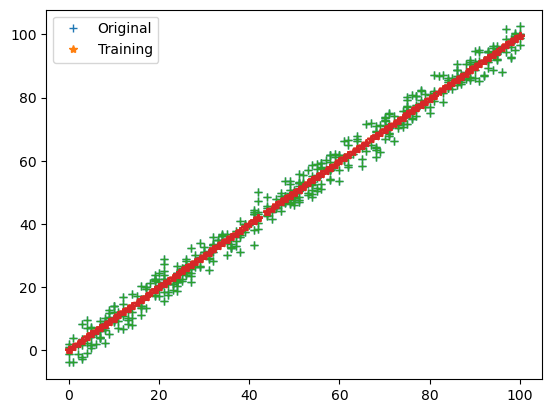

Itiration : 16 Loss : 3.9265757533853476


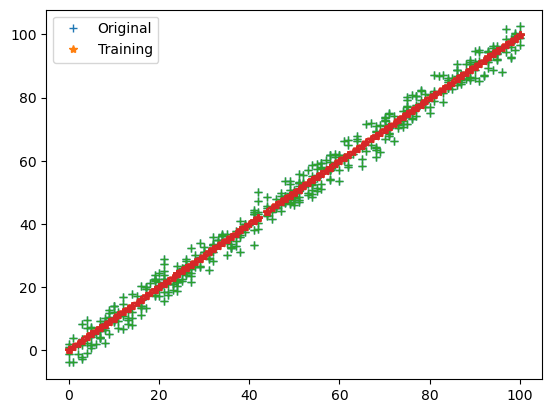

Itiration : 17 Loss : 3.9271995648693006


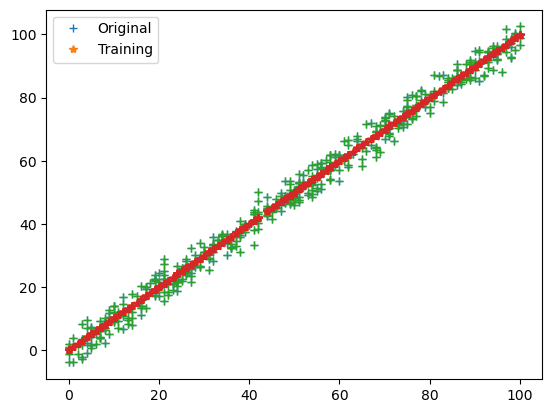

Itiration : 18 Loss : 3.9289473779799065


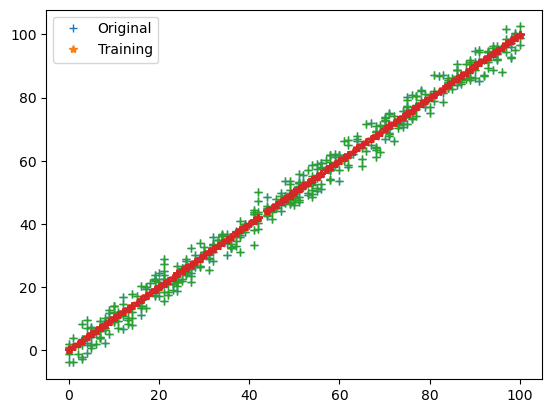

Itiration : 19 Loss : 3.930729404002306


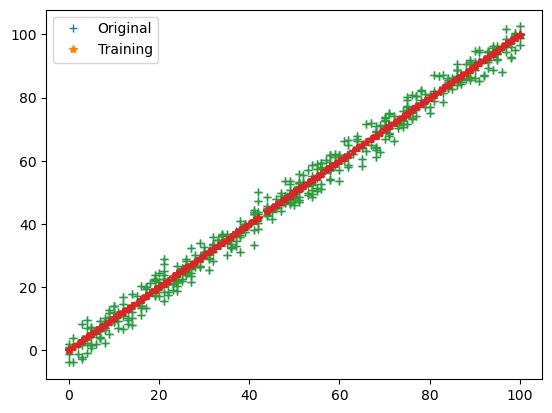

Itiration : 20 Loss : 3.9322052818965885


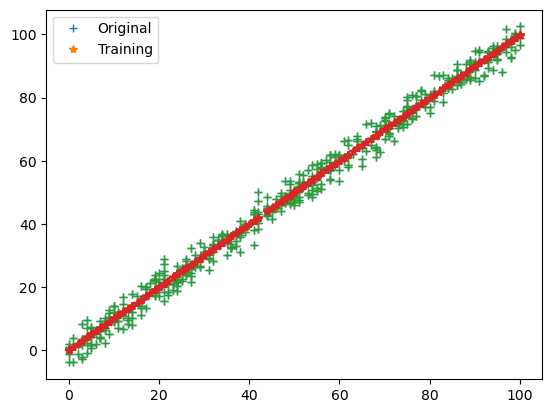

In [43]:
parameters, loss = train(train_input,train_output,0.0001,20)

In [44]:
print(parameters)

{'m': 0.9976234796657688, 'c': 0.12197048794510083}


In [45]:
loss

[1500.2104911977592,
 682.8351180244102,
 311.60472905177926,
 143.12046857097386,
 66.73352162330312,
 32.15564642797205,
 16.540066927620543,
 9.51284168618925,
 6.367383299236768,
 4.97095604347764,
 4.358900882837949,
 4.096087430410016,
 3.9870512051309683,
 3.944538989901448,
 3.929978279163606,
 3.9265757533853476,
 3.9271995648693006,
 3.9289473779799065,
 3.930729404002306,
 3.9322052818965885]

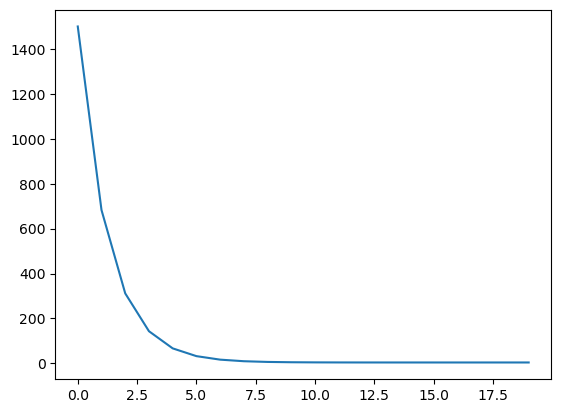

In [46]:
plt.plot(loss)

## predictions

In [47]:
test_predictions = test_input * parameters["m"] + parameters["c"]

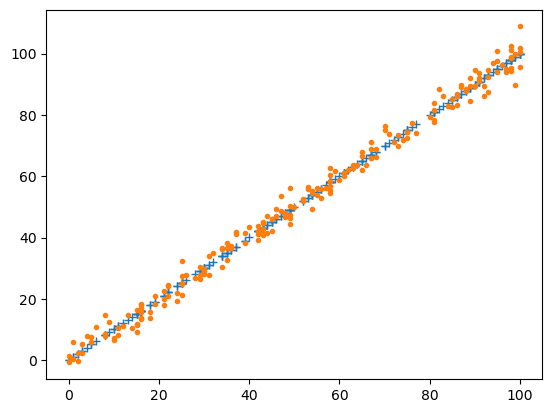

In [50]:
plt.plot(test_input,test_predictions,"+")
plt.plot(test_input,test_output,".")
plt.show()

## cost of prediction

In [51]:
cost_function(test_output,test_predictions)

3.959347986320459

## using scikit

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr_model = LinearRegression()


In [55]:
lr_model.fit(train_input,train_output)

LinearRegression()

In [56]:
lr_model.coef_

array([[1.0009993]])

In [57]:
lr_model.intercept_

array([-0.23603461])

In [58]:
test_predictions = lr_model.predict(test_input)

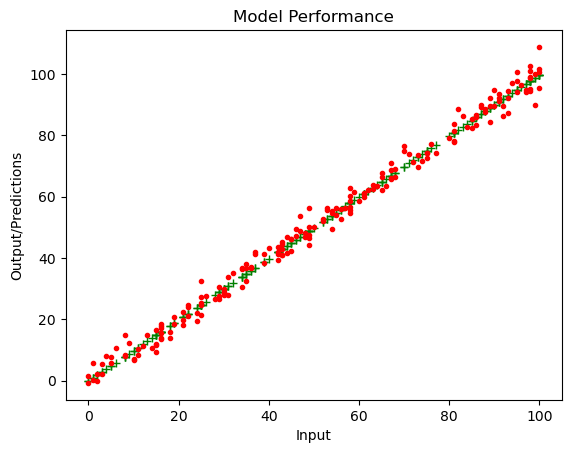

In [59]:
plt.plot(test_input,test_predictions,"+", color = "green")
plt.plot(test_input,test_output,".", color = "red")
plt.title("Model Performance")
plt.xlabel("Input")
plt.ylabel("Output/Predictions")
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error

In [62]:
cost = mean_squared_error(test_output,test_predictions)
cost

8.030031591835378